In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error


# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# read the data
df_3 = pd.read_csv("/content/Energy_consumption_df_kaggle_.csv")

# print the first five columns
df_3.head()

# print the data dimension
df_3.shape

,0,1,2,3,4,5,6,date
0,-2869.224173,317.463310,-1225.577925,518.851875,-961.473755,-442.683208,-634.732078,2014-12-31 23:00:00
1,-3861.420336,-464.252602,-1353.514154,588.138282,-557.340841,-367.365124,-789.537433,2015-01-01 00:00:00
2,-5315.676335,-1016.819173,-1223.945054,428.529937,-519.942278,-346.682439,-898.149380,2015-01-01 01:00:00
3,-6466.083367,-1154.002294,-1120.336516,40.730065,-427.642042,-600.107474,-772.351159,2015-01-01 02:00:00
4,-7371.314416,-1450.827592,-874.785751,37.053525,-282.196911,-597.677192,-921.525250,2015-01-01 03:00:00


(35040, 8)

In [3]:
# print some info about the data
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       35040 non-null  float64
 1   1       35040 non-null  float64
 2   2       35040 non-null  float64
 3   3       35040 non-null  float64
 4   4       35040 non-null  float64
 5   5       35040 non-null  float64
 6   6       35040 non-null  float64
 7   date    35040 non-null  object 
dtypes: float64(7), object(1)
memory usage: 2.1+ MB


In [4]:
# print som statistical information about the data
df_3.describe()

,0,1,2,3,4,5,6
count,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04
mean,-1.049864e-12,-6.312475e-13,-1.328942e-13,2.325649e-13,2.325649e-13,4.169556e-13,-1.179436e-13
std,5.000706e+03,3.518708e+03,2.053797e+03,1.670531e+03,1.360803e+03,9.188718e+02,7.128758e+02
min,-1.192703e+04,-7.230722e+03,-6.626162e+03,-4.785763e+03,-5.925814e+03,-3.017090e+03,-2.972970e+03
25%,-4.233304e+03,-2.650425e+03,-1.422322e+03,-9.207436e+02,-9.695022e+02,-6.855468e+02,-4.401006e+02
50%,3.373185e+01,-6.222457e+02,-2.499096e+02,1.152979e+02,3.575713e-01,-8.990643e+01,4.464124e+01
75%,3.836765e+03,2.086939e+03,1.246675e+03,1.042922e+03,8.930055e+02,6.378769e+02,4.914335e+02
max,1.386479e+04,1.348052e+04,8.062646e+03,5.746713e+03,7.502807e+03,3.454113e+03,7.883676e+03


In [5]:
# set date column as an index
df_3["date"] = pd.to_datetime(df_3["date"])
df_3.set_index("date", inplace= True)

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, '0')

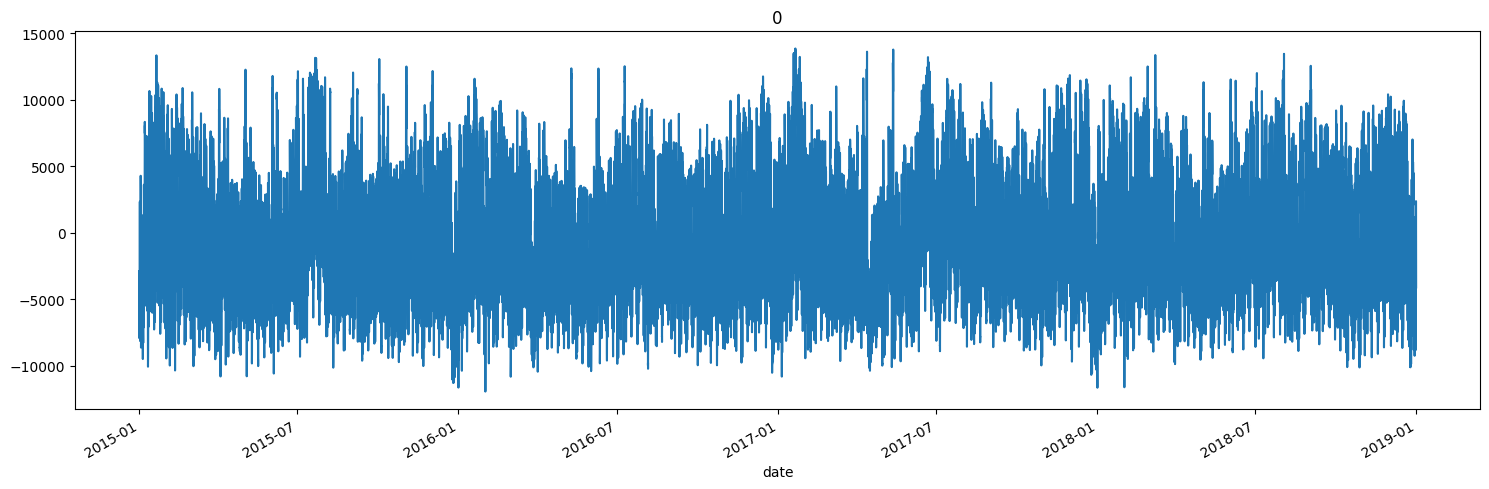

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, '1')

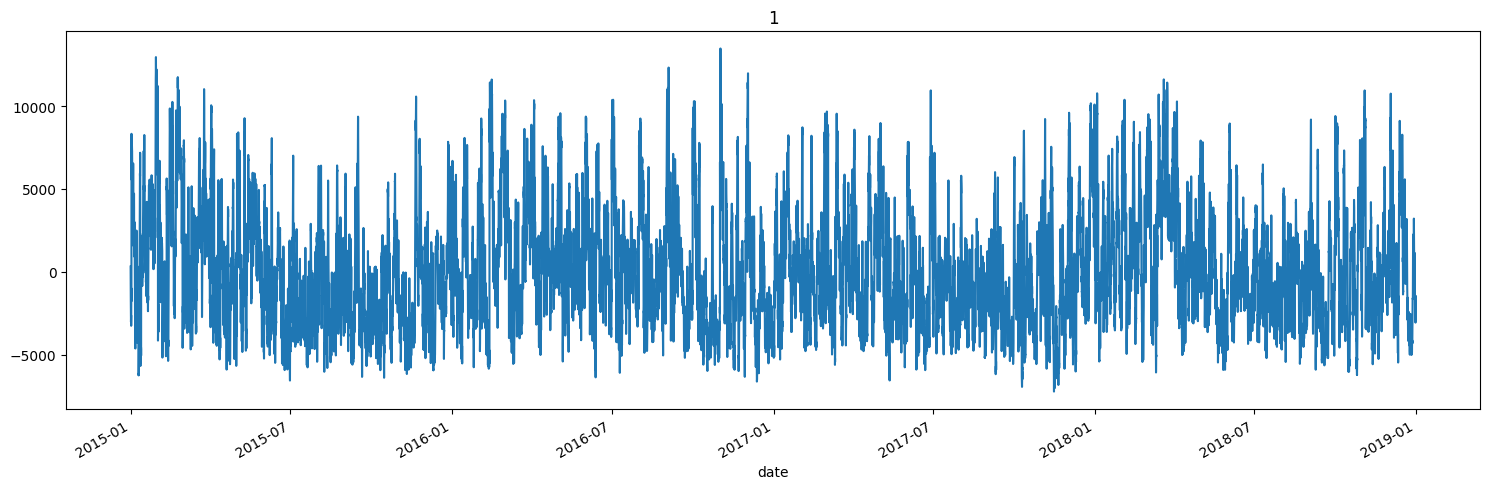

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, '2')

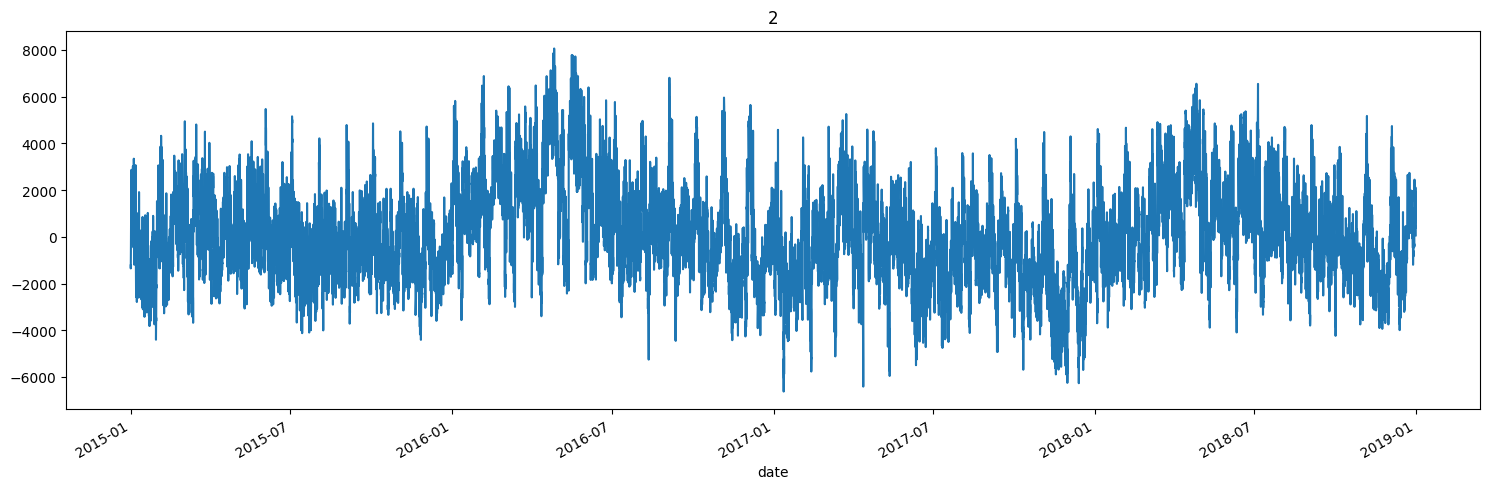

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, '3')

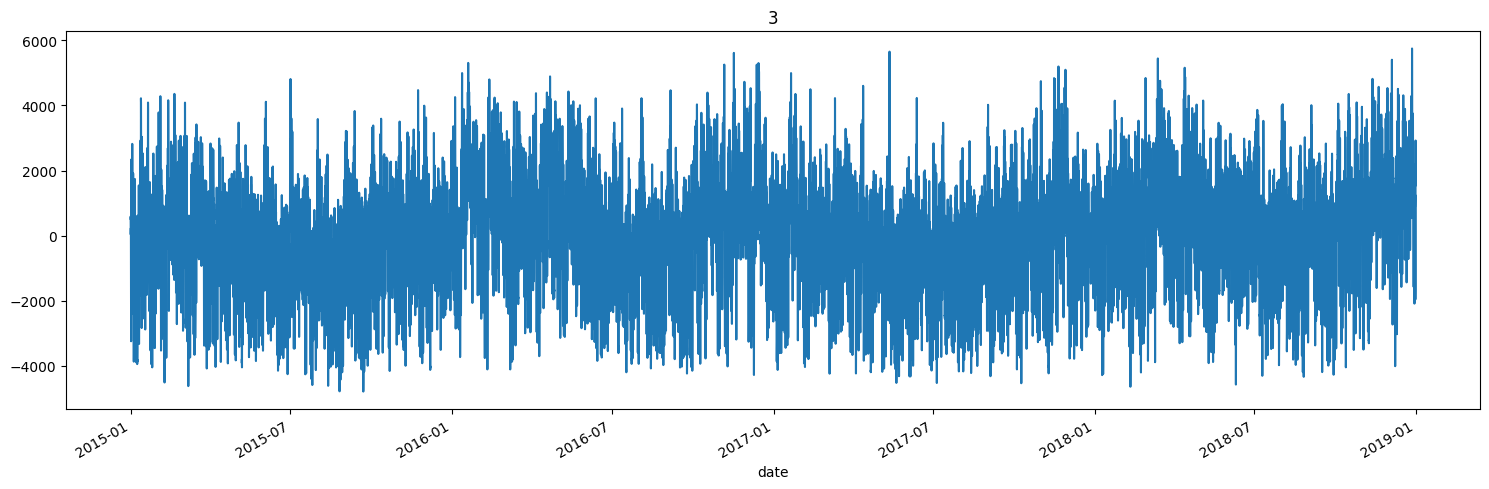

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, '4')

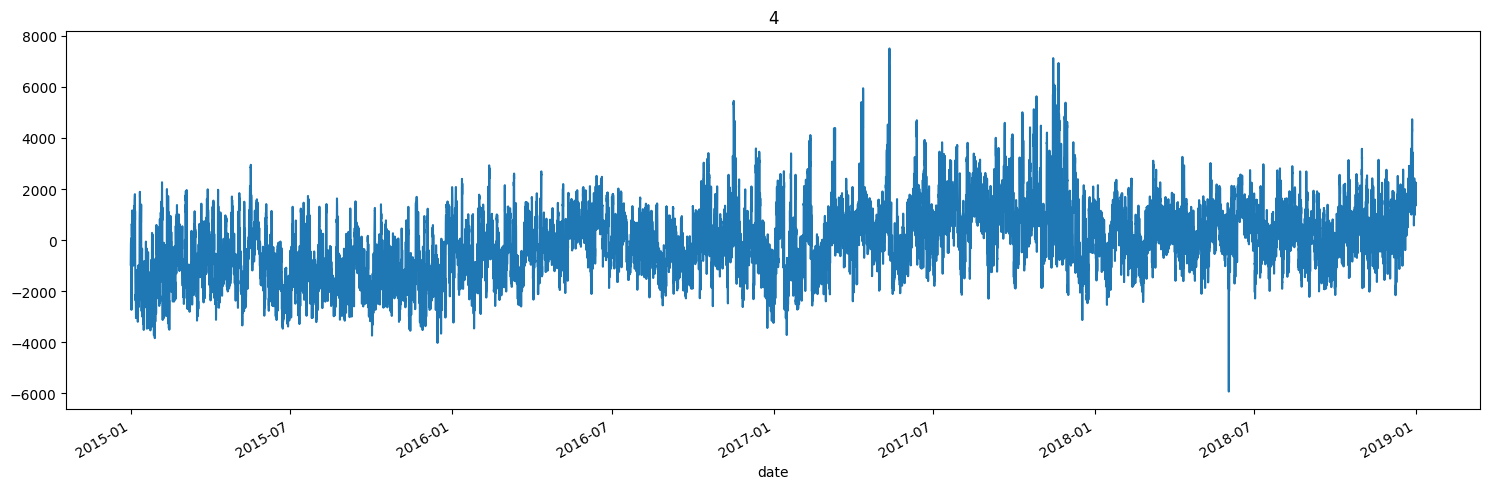

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, '5')

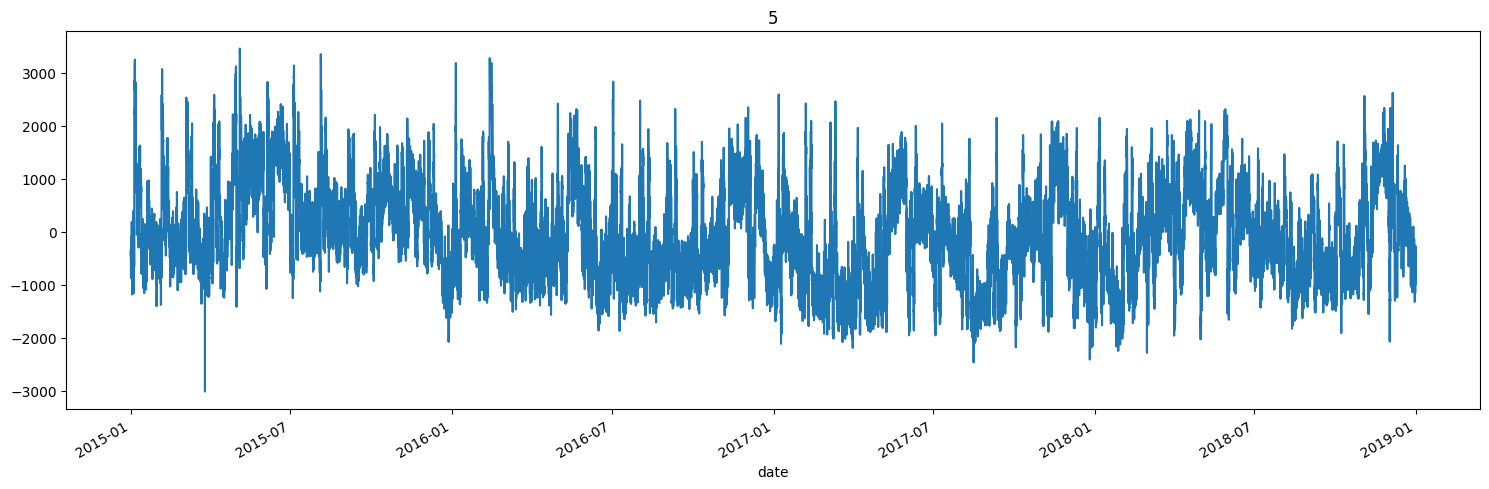

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, '6')

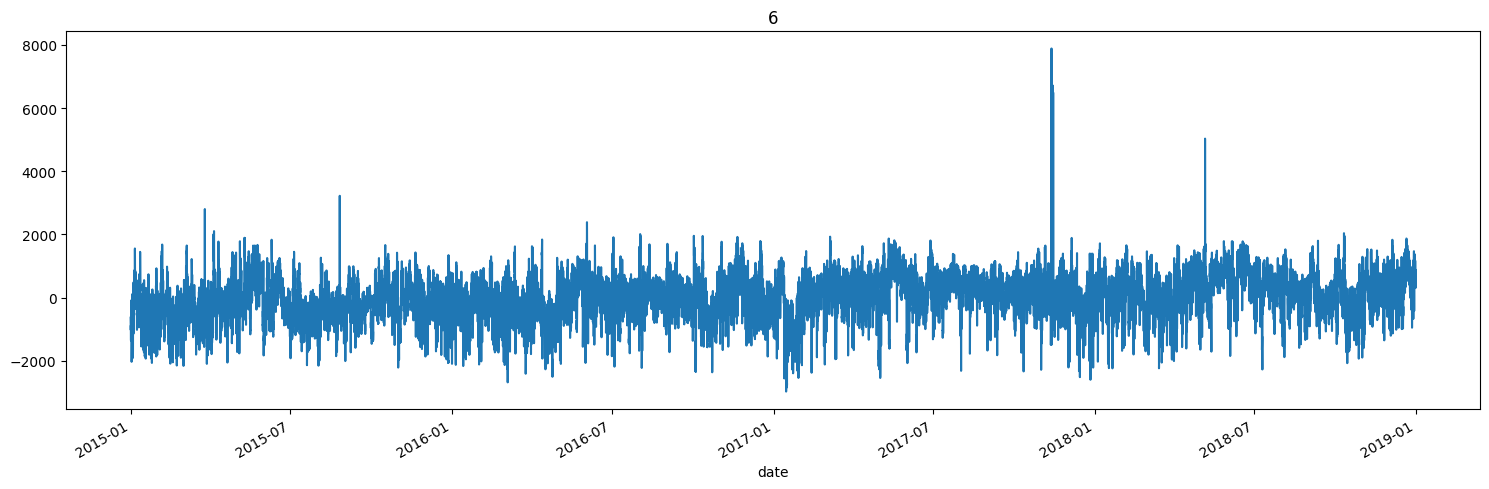

In [7]:
# display the other features through the time

columns = ['0', '1', '2', '3', '4', '5', '6']

for col in columns:
    plt.figure(figsize=(15, 5))
    df_3[col].plot()
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [8]:
# choose all features because of multi-variant

n_cols = 7
cols = list(df_3.loc[:,:])
dataset = df_3[cols]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(35040, 7)

In [9]:
# perform minmaxscaler on the data
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

In [10]:
# split the data and specify the training data
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size

train_data = scaled_data[0:train_size, :]

train_data.shape

(28032, 7)

In [11]:
# Creating a Training set with 336 time-steps
x_train = []
y_train = []
time_steps = 336
n_cols = 7

for i in range(time_steps, len(scaled_data)):
    x_train.append(scaled_data[i-time_steps:i, :n_cols])
    y_train.append(scaled_data[i, :n_cols])

In [12]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

x_train.shape , y_train.shape

((34704, 336, 7), (34704, 7))

In [13]:
# bulid the model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], n_cols)),
    LSTM(256, return_sequences=True),
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(n_cols)
])

# compile the model
model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mse")

# train the model
history = model.fit(x_train, y_train, epochs= 100,validation_split=.2, batch_size= 32)

Epoch 1/100
868/868 [==============================] - 56s 51ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 2/100
868/868 [==============================] - 44s 50ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 3/100
868/868 [==============================] - 43s 49ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4/100
868/868 [==============================] - 43s 50ms/step - loss: 9.2267e-04 - mse: 9.2267e-04 - val_loss: 8.4006e-04 - val_mse: 8.4006e-04
Epoch 5/100
868/868 [==============================] - 48s 55ms/step - loss: 8.5253e-04 - mse: 8.5253e-04 - val_loss: 7.5355e-04 - val_mse: 7.5355e-04
Epoch 6/100
868/868 [==============================] - 45s 52ms/step - loss: 8.2435e-04 - mse: 8.2435e-04 - val_loss: 7.8850e-04 - val_mse: 7.8850e-04
Epoch 7/100
868/868 [==============================] - 43s 49ms/step - loss: 7.9609e-04 - mse: 7.9609e-04 - val_loss: 7.0631e-04 - val_mse: 7.

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Losses')

Text(0.5, 0, 'epochs')

Text(0, 0.5, 'loss')

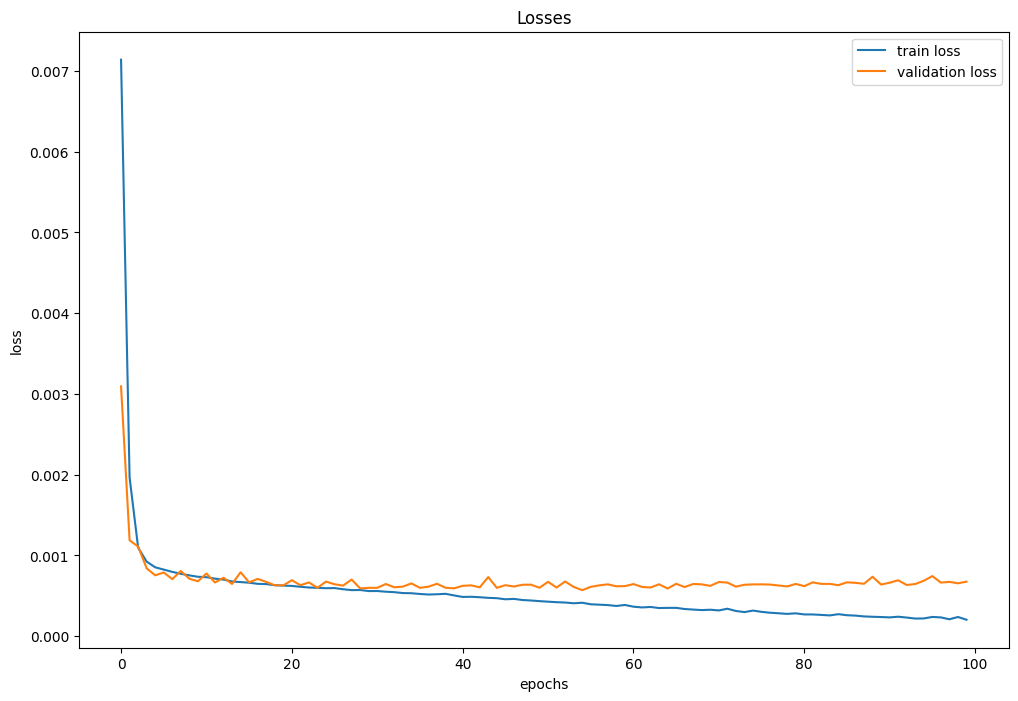

In [14]:
# plot the loss function for training and validation
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(['train loss','validation loss'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# prediction_length_336

In [15]:
# Creating a testing set with 336 time-steps
time_steps = 336
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 7

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [16]:
# Get Prediction
predictions = model.predict(x_test)
predictions.shape

# Compute MSE and MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

219/219 [==============================] - 5s 18ms/step


(7008, 7)

Mean Squared Error (MSE): 0.0006713967347404352
Mean Absolute Error (MAE): 0.017243730388292595


In [17]:
# inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(7008, 7)

In [18]:
# inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [19]:
# put predictions and actuals in a single dataframe
preds_df = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_df

,Predictions,Actuals
0,-854.473755,-1098.662067
1,8752.368164,9091.165256
2,900.407410,881.420555
3,2163.135742,2224.793465
4,644.805481,457.908648
...,...,...
49051,195.839615,60.227087
49052,1081.258301,1547.419067
49053,1374.094116,2243.739059
49054,-854.434509,-801.646232


<Figure size 1600x600 with 0 Axes>

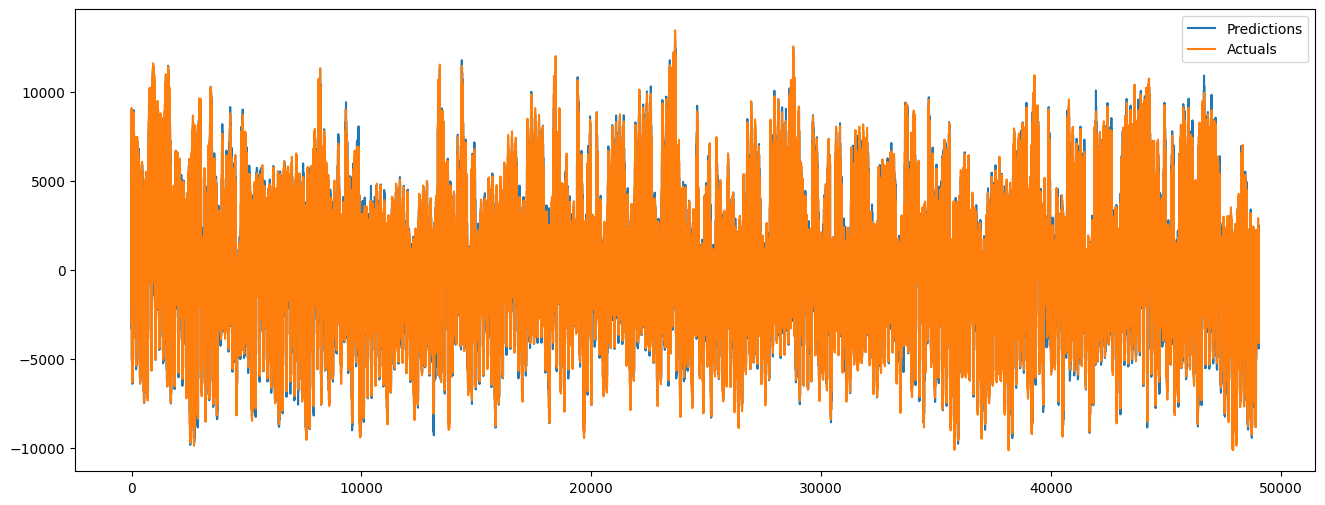

In [20]:
# plot predictions VS actuals
plt.figure(figsize = (16, 6))
plt.plot(preds_df['Predictions'])
plt.plot(preds_df['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

# prediction_length_96

In [21]:
# Creating a testing set with 96 time-steps
time_steps = 96
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 7

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [22]:
# Get Prediction
predictions = model.predict(x_test)
predictions.shape

# Compute MSE and MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

219/219 [==============================] - 2s 7ms/step


(7008, 7)

Mean Squared Error (MSE): 0.0006706995405252354
Mean Absolute Error (MAE): 0.017240733478993527


In [23]:
# inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(7008, 7)

In [24]:
# inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [25]:
# put predictions and actuals on a single dataframe
preds_df = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_df

,Predictions,Actuals
0,-857.316284,-1098.662067
1,8751.496094,9091.165256
2,900.206909,881.420555
3,2163.081543,2224.793465
4,645.366577,457.908648
...,...,...
49051,195.521790,60.227087
49052,1080.420898,1547.419067
49053,1372.726318,2243.739059
49054,-852.974548,-801.646232


<Figure size 1600x600 with 0 Axes>

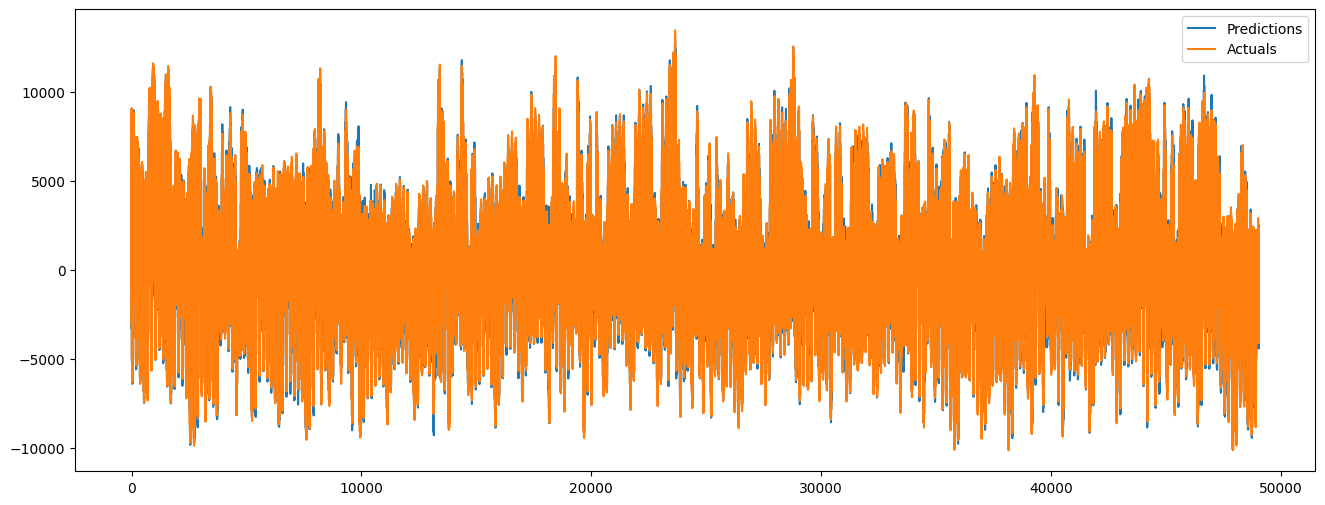

In [26]:
# plot predictions VS actuals
plt.figure(figsize = (16, 6))
plt.plot(preds_df['Predictions'])
plt.plot(preds_df['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

# prediction_length_192

In [27]:
# Creating a testing set with 192 time-steps
time_steps = 192
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 7

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [28]:
# Get Prediction
predictions = model.predict(x_test)
predictions.shape

# Compute MSE and MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

219/219 [==============================] - 3s 12ms/step


(7008, 7)

Mean Squared Error (MSE): 0.0006715547673817845
Mean Absolute Error (MAE): 0.017245171973554067


In [29]:
# inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(7008, 7)

In [30]:
# nverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [31]:
# put predictions and actuals at one dataframe
preds_df = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_df

,Predictions,Actuals
0,-854.475281,-1098.662067
1,8752.363281,9091.165256
2,900.407410,881.420555
3,2163.135742,2224.793465
4,644.806274,457.908648
...,...,...
49051,195.841354,60.227087
49052,1081.257080,1547.419067
49053,1374.090210,2243.739059
49054,-854.432556,-801.646232


<Figure size 1600x600 with 0 Axes>

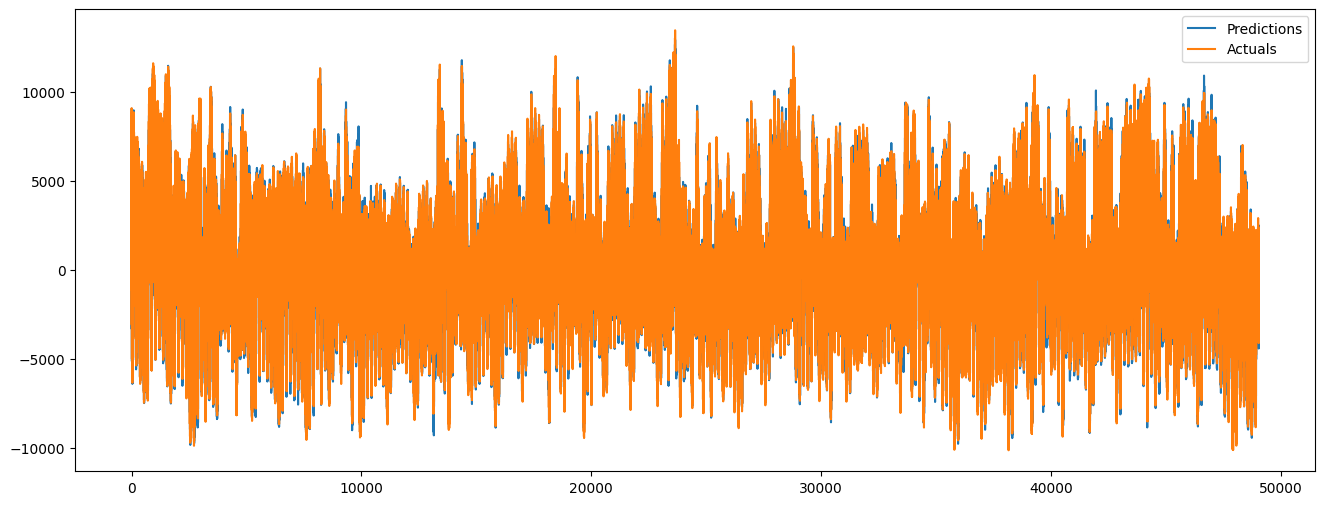

In [32]:
# plot predictions VS actuals
plt.figure(figsize = (16, 6))
plt.plot(preds_df['Predictions'])
plt.plot(preds_df['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

#prediction_length_720

In [33]:
# Creating a testing set with 720 time-steps
time_steps = 720
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 7

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [34]:
# Get Prediction
predictions = model.predict(x_test)
predictions.shape

# Compute MSE and MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

219/219 [==============================] - 8s 36ms/step


(7008, 7)

Mean Squared Error (MSE): 0.000671396535463192
Mean Absolute Error (MAE): 0.01724372950405254


In [35]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(7008, 7)

In [36]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [37]:
# put predictions and actuals at single dataframe
preds_df = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_df

,Predictions,Actuals
0,-854.475281,-1098.662067
1,8752.366211,9091.165256
2,900.406555,881.420555
3,2163.134277,2224.793465
4,644.806274,457.908648
...,...,...
49051,195.840485,60.227087
49052,1081.257690,1547.419067
49053,1374.094971,2243.739059
49054,-854.434509,-801.646232


<Figure size 1600x600 with 0 Axes>

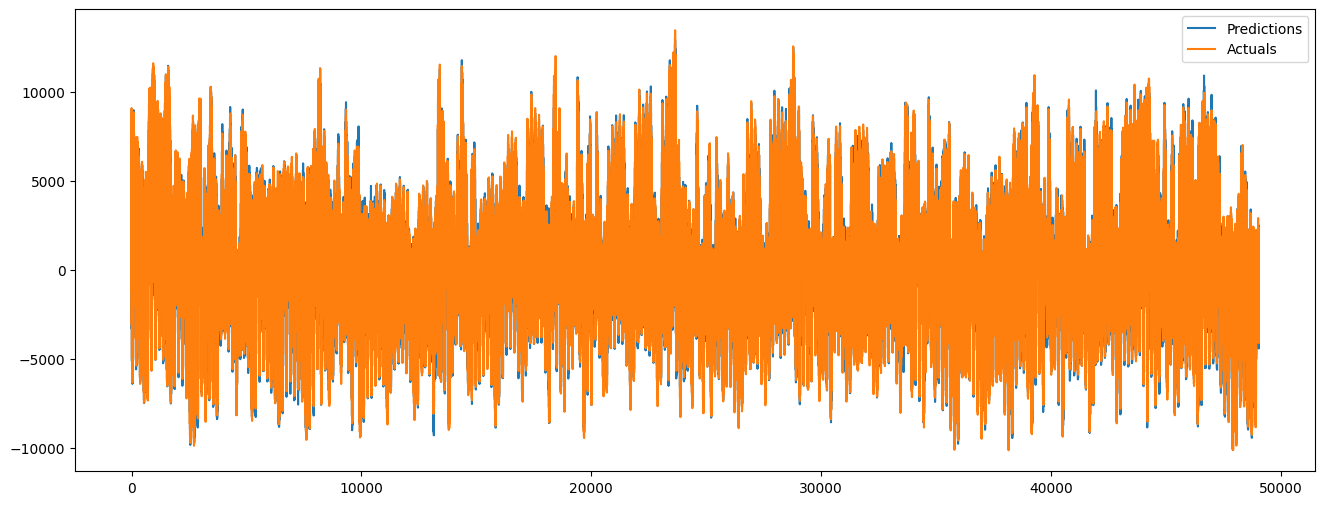

In [38]:
# plot predictions VS actuals
plt.figure(figsize = (16, 6))
plt.plot(preds_df['Predictions'])
plt.plot(preds_df['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()